# Phase Space Flow Visualization Examples in Jupyter

## Chapters:
* [Static Visualization](#static)
* [IPython Widgets](#widgets)
* [Animation with ffmpeg](#ffmpeg)
    
Creating animation video files requires the commandline tool ffmpg (https://www.ffmpeg.org/) 

## Static Visualization <a class="anchor" id="static"></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

#### Homework 1, Problem 1c) 

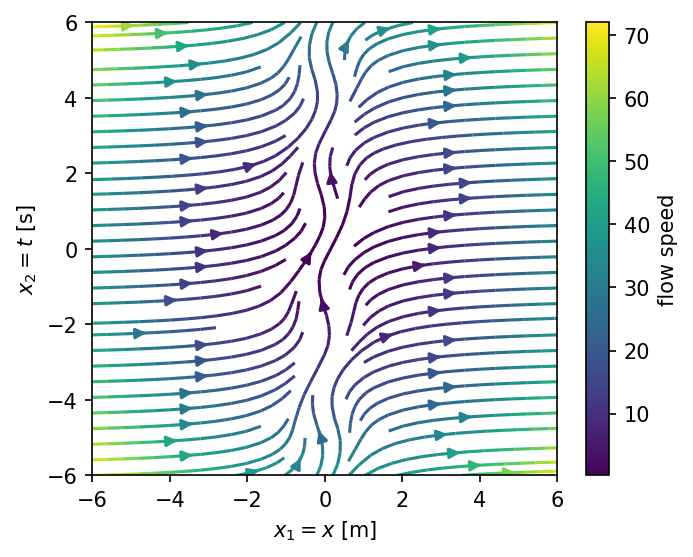

In [67]:
# Creating Grid of Initial Conditions for Flow visualization
w = 6
# Position Grid
Y, X = np.mgrid[-w:w:20j, -w:w:20j]
# Velocity Grid
U =  X**2 + 0.5*np.cos(2*Y)
V = X/X
# Flow speed
speed = np.sqrt(U**2 + V**2)

# Creating plot
fig = plt.figure(figsize = (5, 4), dpi=150)
plt.streamplot(X, Y, U, V, density = 1, color=X**2+Y**2)
plt.colorbar(label='flow speed')
plt.xlabel(r'$x_1 = x$ [m]')
plt.ylabel(r'$x_2 = t$ [s]')
plt.show()

#### Harmonic Oscillator

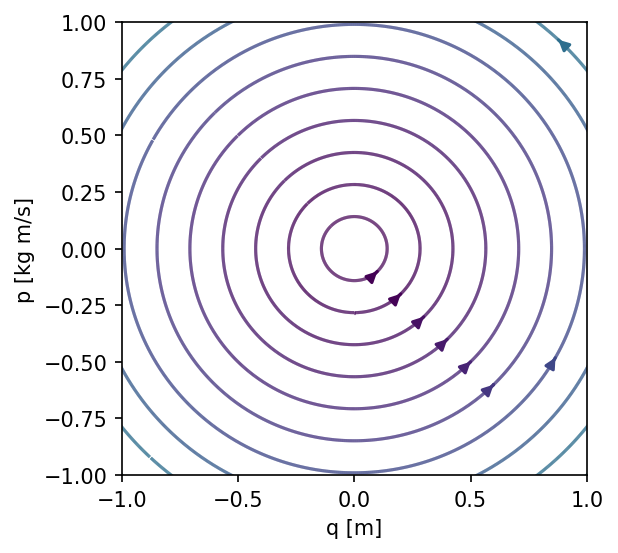

In [68]:
# Creating Grid of Initial Conditions
w = 1.5
Y, X = np.mgrid[-w:w:10j, -w:w:10j]
U =  -Y
V =  X
speed = np.sqrt(U**2 + V**2)
stream_points = np.array(list(zip(np.arange(-1.,1.,.1), -np.arange(-1.,1.,.1))))

# Creating plot
fig = plt.figure(figsize = (4, 4), dpi=150)
plt.streamplot(X, Y, U, V, start_points=stream_points, density = 35, color=X**2+Y**2)
plt.xlabel(r'q [m]')
plt.ylabel(r'p [kg m/s]')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

#### Ideal Pendulum

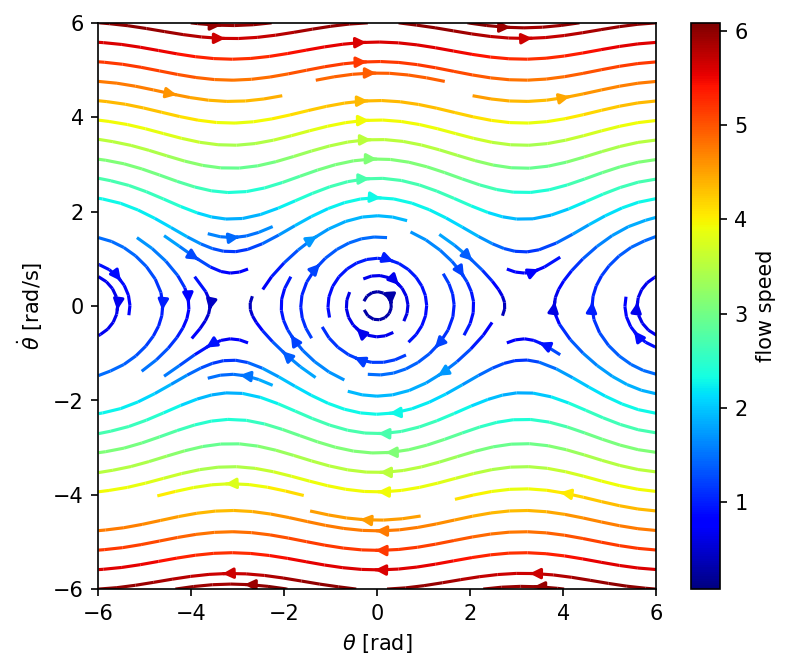

In [71]:
# Create Grid of Initial Conditions
w = 6
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U =  Y
V = - np.sin(X)
speed = np.sqrt(U**2 + V**2)

# Choose different color map
cmap=plt.get_cmap("jet")

# Create plot
fig = plt.figure(figsize = (6, 5),dpi=150)
plt.streamplot(X, Y, U, V, density = 1, color=speed, cmap=cmap)
cb=plt.colorbar(label='flow speed')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.show()

#### Damped Pendulum

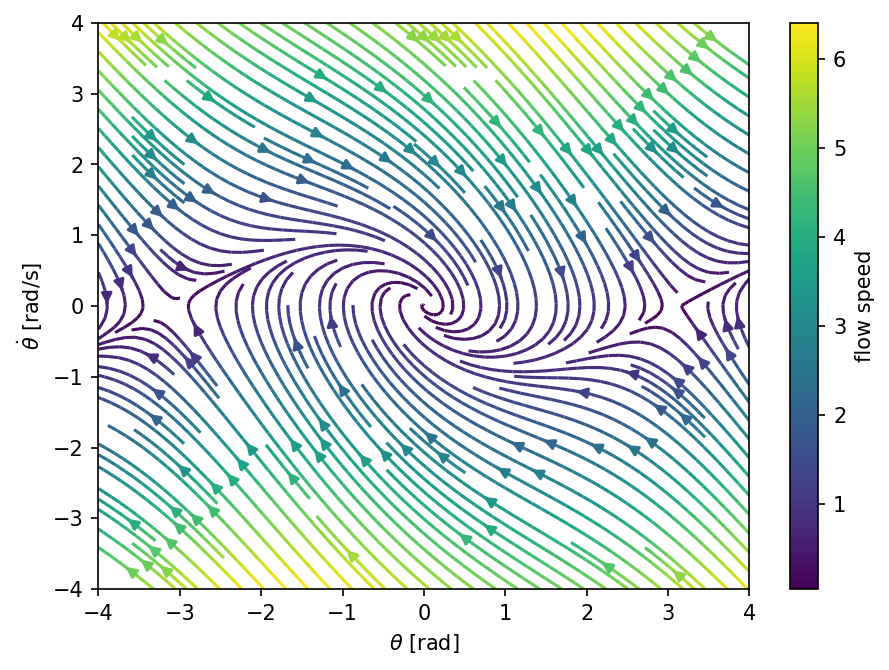

In [72]:
# Creating data set
w = 4
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U =  Y
V = - np.sin(X) - U
speed = np.sqrt(U**2 + V**2)

# Creating plot
fig = plt.figure(figsize = (7, 5),dpi=150)
plt.streamplot(X, Y, U, V, density = 2, color=speed)
plt.colorbar(label='flow speed')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
# show plot
plt.show()

## IPython Widgets <a class="anchor" id="widgets"></a>

In [84]:
# Import libraries
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

#### Sin( w x + b)

In [85]:
# Define function to plot
def f(w, b):
    plt.figure(2,figsize=(4,3), dpi=150)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, np.sin(w * x + b))
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('sin(w x + b)')
    plt.show()

# Create widget
interactive_plot = interactive(f, w=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

#### Damped Pendulum

In [86]:
# Define function to plot
def f(nstep):
   
    fig = plt.figure(figsize = (7, 5),dpi=150)

    # Initial Condition Grid
    w = 4
    dt=0.002
    Y, X = np.mgrid[-w:w:10j, -w:w:10j]

    U =  Y
    V = - np.sin(X) - U
    
    # Euler integration
    for i in range(nstep):
    
        X = X+i*dt*U
        Y = Y+i*dt*V

        U =  Y
        V = - np.sin(X) - U
        
    speed = np.sqrt(U**2 + V**2)
    
    # Choose color map
    cmap=plt.get_cmap("jet")
    
    # Creating plot
    fig, ax = plt.subplots(1,1, figsize = (3, 3), dpi=150)
    plt.quiver(X, Y, U, V, speed, cmap=cmap, scale=60)
    plt.xlim(-w,w)
    plt.ylim(-w,w)
    plt.xlabel(r'$\theta$ [rad]')
    plt.ylabel(r'$\dot{\theta}$ [rad/s]')
    plt.show()

# Create widget
interactive_plot = interactive(f,nstep=(0, 100),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot


interactive(children=(IntSlider(value=50, description='nstep'), Output(layout=Layout(height='600px'))), _dom_c…

## Animation with ffmpeg <a class="anchor" id="ffmpeg"></a>
Creating animation video files requires the command line tool ffmpg (https://www.ffmpeg.org/).

In [87]:
# Import libraries 
import os
import matplotlib.colors
import matplotlib.pyplot as plt

#### Damped Pendulum

In [89]:
# make local directory if not present


path = "./figures"

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory "+path+" was created!")

In [91]:

# Determine Initial Condition Grid Size
w = 7
Y, X = np.mgrid[-w:w:20j, -w:w:20j]

#Initialize System 
U = Y
V = X
k = 1

# Make sure colors fall within the right range
norm=matplotlib.colors.Normalize(vmin=0, vmax=6, clip=False)


for i in range(150):
    # Propagate entire system (Euler step)
    dt=0.01
    Y = Y+V*dt
    X = X+U*dt
    # Calculate new derivatives    
    U =  Y
    V = - k*X
    # Calculate speed in phase space
    speed = np.sqrt(U**2+V**2)

    # Choose color map
    cmap=plt.get_cmap("jet")
    
    # Creating plot
    fig, ax = plt.subplots(1,1, figsize = (7, 7))
    plt.quiver(X, Y, U, V, speed, cmap=cmap, scale=60)

    # Limit plot range
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    
    # Set x and y axis label
    plt.xlabel(r'$\theta$ [rad]')
    plt.ylabel(r'$\dot{\theta}$ [rad/s]')
    
    # Plot Fixed Point
    plt.scatter(0,0,label='Stable Fixed Point',s=60, c='green')
    
    # Plot Flow in Phase Space
    fname='phase_portrait'+str(i).zfill(3)
    plt.savefig(path+'/'+fname+'.jpg', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', format="jpg",
        transparent=False, bbox_inches=None, pad_inches=0.1)
    
    pc = ax.pcolormesh(speed, norm=norm, cmap=cmap)
    fig.colorbar(pc, ax=ax)
    
    plt.close()

In [16]:
# Linux system: check if individual image files were created
!cd figures; ls

phase_portrait000.jpg  phase_portrait050.jpg  phase_portrait100.jpg
phase_portrait001.jpg  phase_portrait051.jpg  phase_portrait101.jpg
phase_portrait002.jpg  phase_portrait052.jpg  phase_portrait102.jpg
phase_portrait003.jpg  phase_portrait053.jpg  phase_portrait103.jpg
phase_portrait004.jpg  phase_portrait054.jpg  phase_portrait104.jpg
phase_portrait005.jpg  phase_portrait055.jpg  phase_portrait105.jpg
phase_portrait006.jpg  phase_portrait056.jpg  phase_portrait106.jpg
phase_portrait007.jpg  phase_portrait057.jpg  phase_portrait107.jpg
phase_portrait008.jpg  phase_portrait058.jpg  phase_portrait108.jpg
phase_portrait009.jpg  phase_portrait059.jpg  phase_portrait109.jpg
phase_portrait010.jpg  phase_portrait060.jpg  phase_portrait110.jpg
phase_portrait011.jpg  phase_portrait061.jpg  phase_portrait111.jpg
phase_portrait012.jpg  phase_portrait062.jpg  phase_portrait112.jpg
phase_portrait013.jpg  phase_portrait063.jpg  phase_portrait113.jpg
phase_portrait014.jpg  phase_portrait064.jpg  ph

In [20]:
# Linux system: convert image files into mpeg video
!cd figures; rm phase_portrait.mpg; ffmpeg -i phase_portrait%03d.jpg -framerate 4 -crf 20 phase_portrait.mpg

rm: cannot remove ‘phase_portrait.mpg’: No such file or directory
ffmpeg version 2.8.15 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-36)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --extra-ldflags='-Wl,-z,relro ' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enabl